<a href="https://colab.research.google.com/github/ewattudo/vis1/blob/main/PS4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
#---------------------------SETUP----------------------------------
#get useful libraries
import time, os, sys, re #basics
import zipfile, json, datetime, string   #string for annotating points in scatter 
import numpy as np #basic math
from statistics import * #stats

!pip install squarify
import squarify 

!pip install adjustText 
from adjustText import adjust_text

import matplotlib.pyplot as plt #import pylab as plt #apparently discouraged now: 
 #https://stackoverflow.com/questions/11469336/what-is-the-difference-between-pylab-and-pyplot
 #https://www.tutorialspoint.com/matplotlib/matplotlib_pylab_module.htm

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
#s4 = Styler(df4, uuid_len=0, cell_ids=False)

import urllib  #weird, guess need to have os and pandas imported for this to work  %TODO/LATER ditch it, its weird anyway, just use wget/curl                                                 

from google.colab import files

#import webbrowser                                                                                                           

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

#many tricks how to extend notebook functionality
#https://coderzcolumn.com/tutorials/python/list-of-useful-magic-commands-in-jupyter-notebook-lab
#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#MAGICS and THEMES/STYLES: important! does affect not just shading/colors, but also fonts, spacing, etc
#(even if you only select default (v not selecting anything) [but does seem to work better if you do make explicit sleections]) 

###magics: https://ipython.readthedocs.io/en/stable/interactive/magics.html
#most essential setup for vis: it does affect vis! careful!! stick with inline, maybe notebook; others mostly for non-notebook, eg spyder environ
#https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html recomends *inline*!
#show current one:
#%matplotlib 
#%matplotlib --list 
#interactive plots:
#%matplotlib notebook  
#static images of your plot:
%matplotlib inline 
#may play with this one and other magics (btw default is probably agg)
#%matplotlib nbagg

###themes/styles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
#https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html
#https://matplotlib.org/stable/tutorials/introductory/customizing.html
#here more about art and style than under the hood functionality as with magics, explore and experiment
#many may find 'default' or seaborn ones more pleasing; my fav 'classic' is back from 90s ;) 
#plt.style.available #list available styles :) may install more
#plt.style.use('default') # more delicate subtle than classic
plt.style.use('classic')  #  'seaborn-whitegrid' 'seaborn-white' 'seaborn-poster'
# btw: magics v theme/style sequence matters, eg if i specify classic style before inline magic, i wouldnt get grey bounding box im getting

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Upload Files

### Camden Comparison

In [2]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/CompReports.csv", "comps")

('comps', <http.client.HTTPMessage at 0x7fdcd13e6ee0>)

In [3]:
os.getcwd() #pwd
os.listdir() #compare to clicking on the left the folder icon #dir

'/content'

['.config', 'comps', 'sample_data']

In [5]:
comps=pd.read_csv('comps')

### Rutgers Comparison

In [7]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/CampCompReports.csv", "campcomps")

('campcomps', <http.client.HTTPMessage at 0x7fdcd13629a0>)

In [8]:
campcomps=pd.read_csv('campcomps')

### Program Pipeline

In [9]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/ProgramDetails.csv", "programs")

('programs', <http.client.HTTPMessage at 0x7fdcd1362b50>)

In [11]:
programs=pd.read_csv('programs')

### Year Over Year Data

In [10]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/YoYCompReports.csv", "yoy")

('yoy', <http.client.HTTPMessage at 0x7fdcd13623d0>)

In [12]:
yoy=pd.read_csv('yoy')

### Fall 2023 Application Data

In [82]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/Fall23AppData.csv", "fallapps")

('fallapps', <http.client.HTTPMessage at 0x7fdcbf5f2c40>)

In [83]:
fall=pd.read_csv('fallapps')

## Dashboard

### Pipelie: Year over Year Comparison

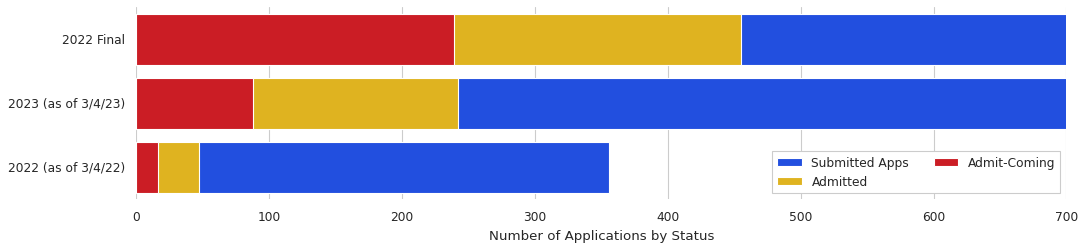

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 3))

# Plot the total apps
sns.set_color_codes("bright")
sns.barplot(x="Submitted", y="Year", data=yoy,
            label="Submitted Apps", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("bright")
sns.barplot(x="Admitted", y="Year", data=yoy,
            label="Admitted", color="y")

# Plot the crashes where alcohol was involved
sns.set_color_codes("bright")
sns.barplot(x="Admit-Coming", y="Year", data=yoy,
            label="Admit-Coming", color="r")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 700), ylabel="",
       xlabel="Number of Applications by Status")
sns.despine(left=True, bottom=True);

### Pipeline: Breakdown by Program

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

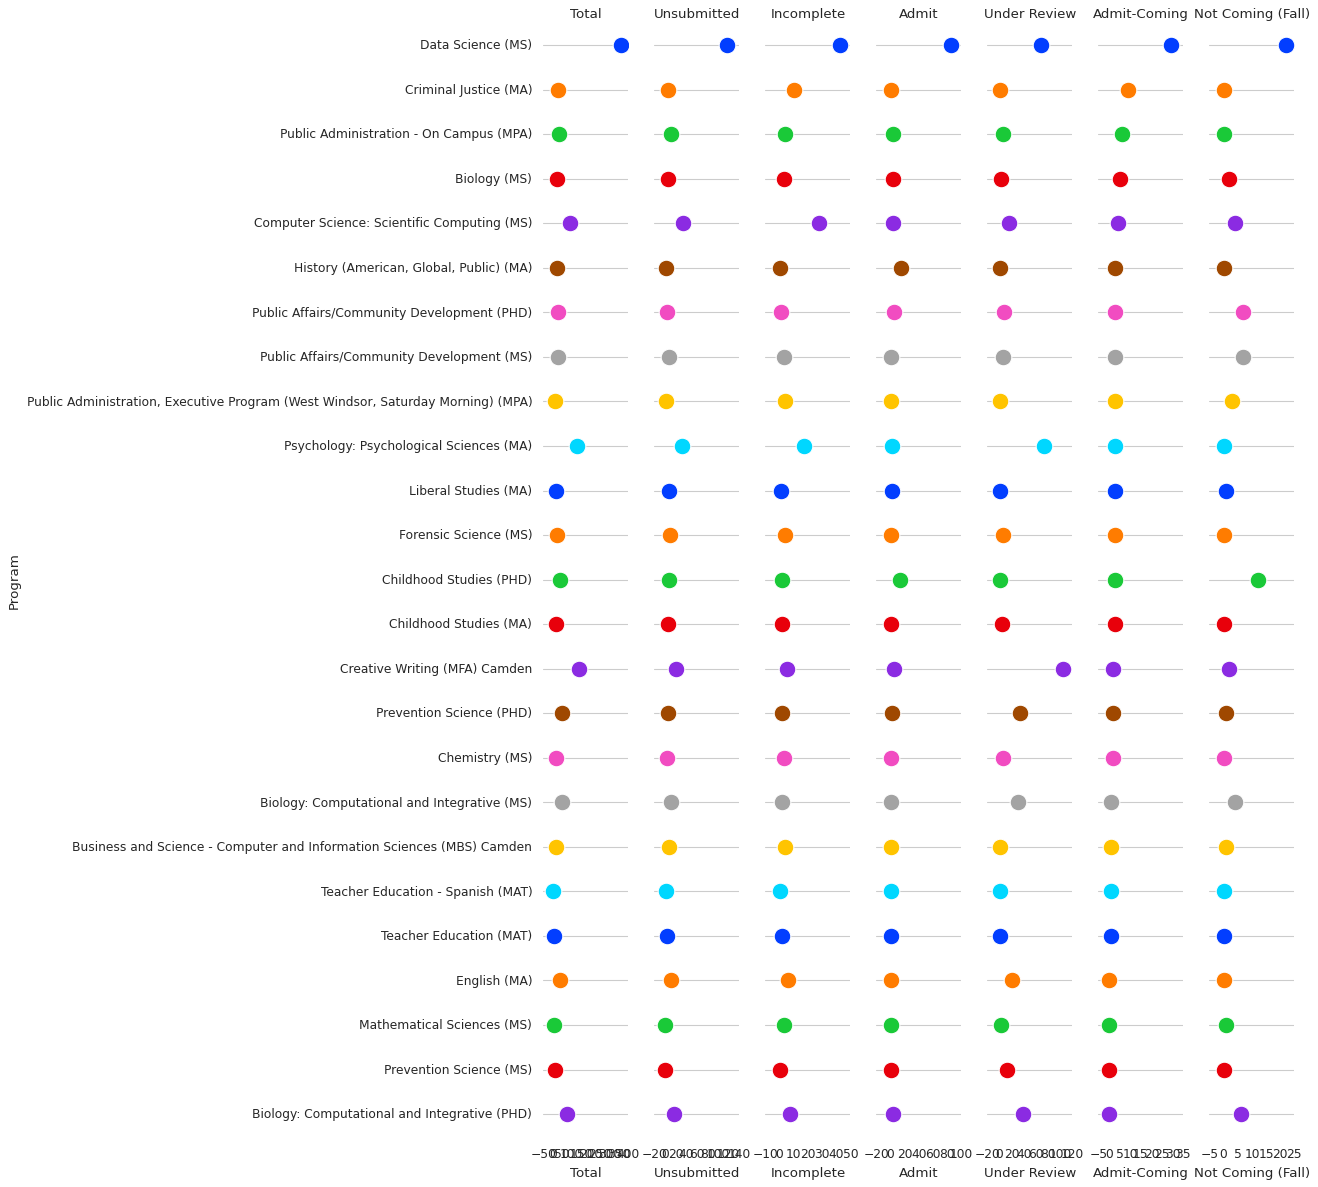

In [113]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Make the PairGrid
g = sns.PairGrid(programs.sort_values("Admit-Coming", ascending=False),
                 x_vars=programs.columns[:-1], y_vars=["Program"],
                 height=15, aspect=.10)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=15, orient="h", jitter=False,
      palette="bright", linewidth=1, edgecolor="w")

# Use semantically meaningful titles for the columns
titles = ['Total','Unsubmitted', 'Incomplete', 'Admit', 'Under Review',
       'Admit-Coming', 'Not Coming (Fall)']

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True);

### Accepted Application Analysis Across Camden

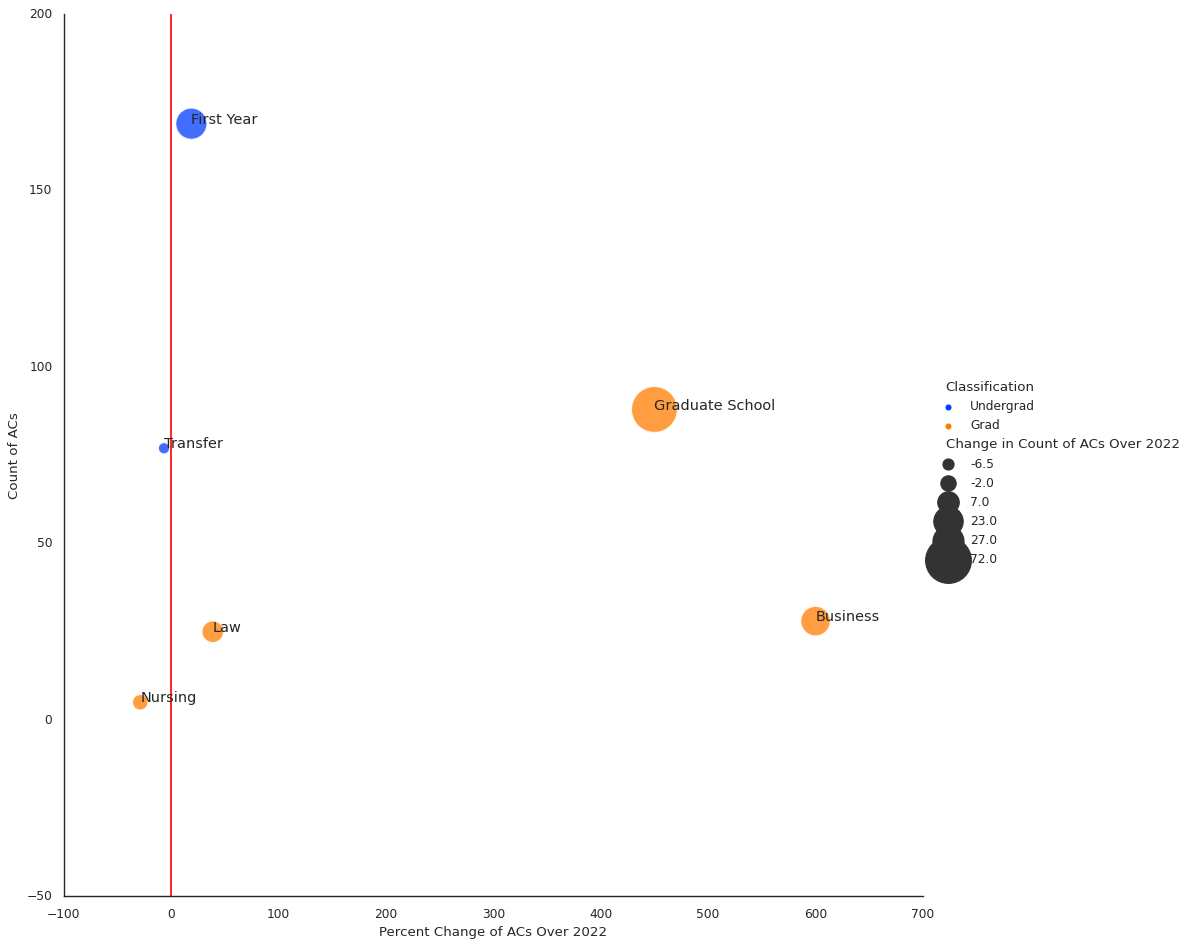

In [ ]:
from numpy.ma.core import compress
import seaborn as sns
sns.set_theme(style="white")

# Plot miles 
sns.relplot(y="Count of ACs", x="Percent Change of ACs Over 2022", 
            hue="Classification", size="Change in Count of ACs Over 2022",
            sizes=(100, 1700), alpha=.75,palette="bright",
            height=12, data=comps)
plt.axvline(x = 0, color = 'red',)

texts = [plt.text(comps['Percent Change of ACs Over 2022'][i],
                  comps['Count of ACs'][i], comps['Category'][i],fontsize=13) 
for i in range(len(comps))]


In [ ]:
campcomps.dtypes

Index                                 int64
School                               object
Count of Acs                          int64
Percent Change of ACs Over 2022     float64
Change in Count of Acs Over 2022      int64
Campus                               object
dtype: object

### Accepted Application Analysis Across Campuses (Grad Only)

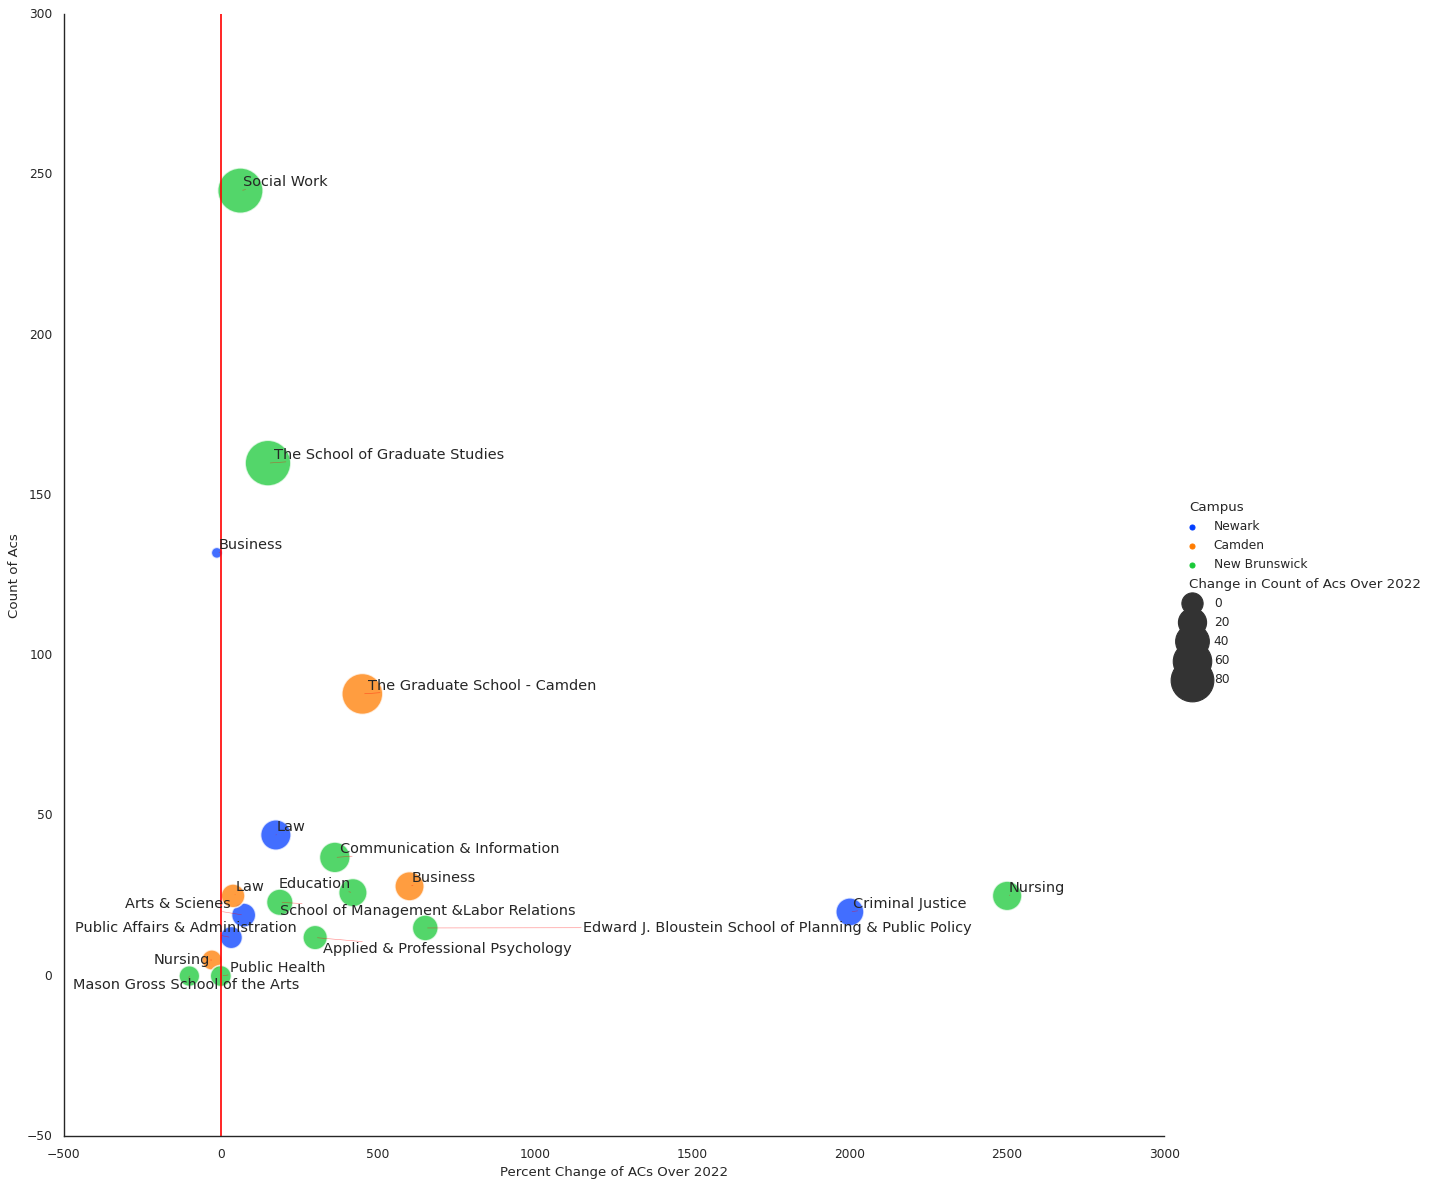

In [ ]:
from numpy.ma.core import compress
import seaborn as sns
sns.set_theme(style="white")
# Plot miles

sns.relplot(y="Count of Acs", x="Percent Change of ACs Over 2022", 
            hue="Campus", size="Change in Count of Acs Over 2022",
            sizes=(100, 1700), alpha=.75,palette="bright",
            height=15, data=campcomps)
plt.axvline(x = 0, color = 'red',)

texts = [plt.text(campcomps['Percent Change of ACs Over 2022'][i],
                  campcomps['Count of Acs'][i], campcomps['School'][i],fontsize=13) 
for i in range(len(campcomps))] 
adjust_text(texts,arrowprops=dict(arrowstyle='-', color='red', alpha=.5,lw=.5));

### Who Applied: Age by Program

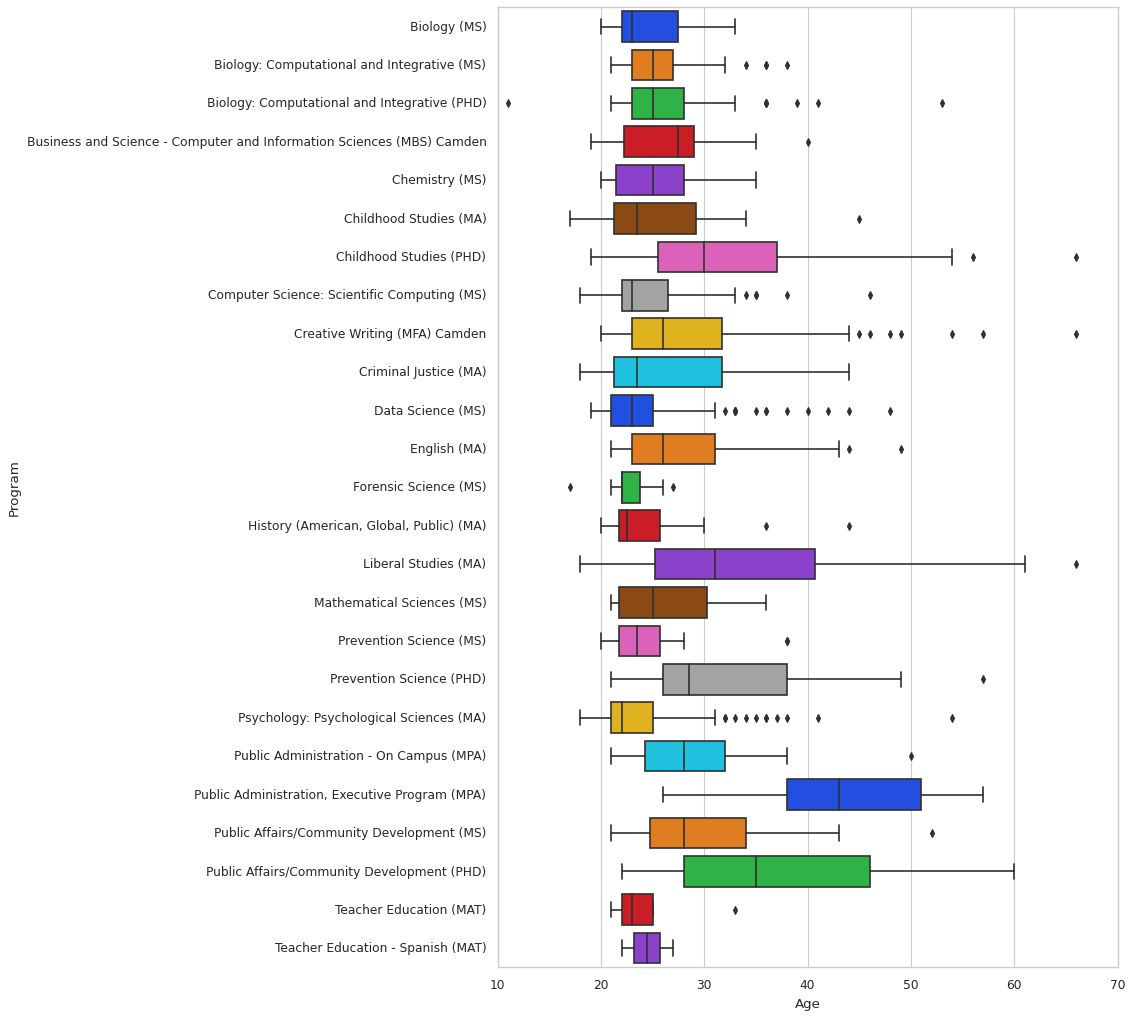

In [68]:
fig, ax = plt.subplots(figsize=(10, 15))

import seaborn as sns
sns.set_theme(style="whitegrid")

my_order = fall.groupby(by=["Program"])["Age"].median('Age').iloc[::1].index
 
sns.boxplot(x='Age', y='Program', palette="bright", data=fall, order=my_order);

<AxesSubplot:ylabel='Program'>

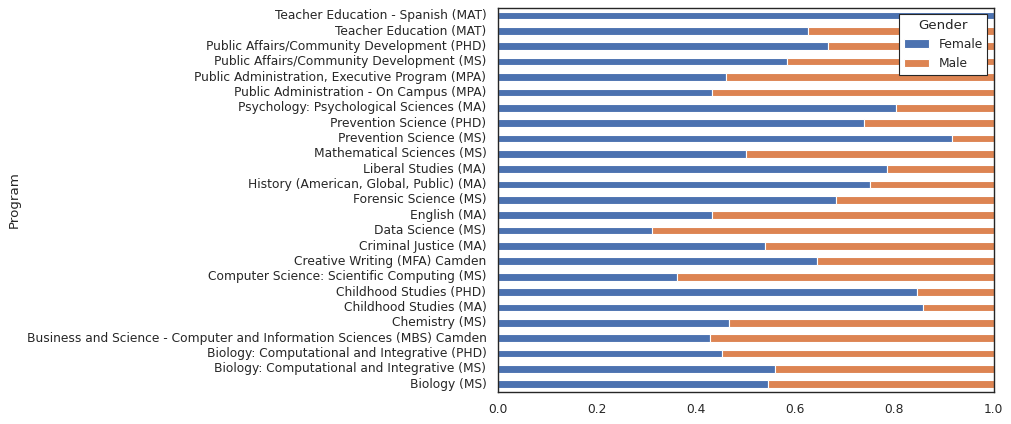

In [29]:
(fall.groupby('Program')['Gender'].value_counts(normalize=True)
   .unstack('Gender').plot.barh(stacked=True)
)

In [95]:
fall['Race'].value_counts()

Asian                                                                                   538
White                                                                                   319
Black or African American                                                               227
None Listed                                                                              70
Hispanic or Latino                                                                       28
Hispanic or Latino; White                                                                14
Asian; White                                                                             13
Black or African American; White                                                          7
Black or African American; Hispanic or Latino                                             6
American Indian or Alaska Native                                                          3
Asian; Native Hawaiian or Other Pacific Islander                                

In [99]:
fallrace = fall['Race'].value_counts()

In [105]:
nfallrace = fallrace.head(5)

In [107]:
nfallrace.dtypes

dtype('int64')

<AxesSubplot:>

(0.0, 100.0, 0.0, 100.0)

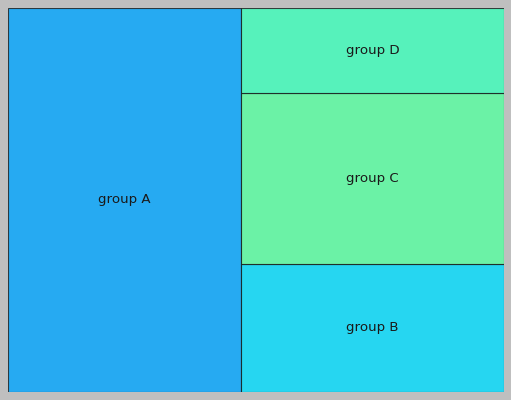

In [102]:
# libraries
import matplotlib.pyplot as plt
import squarify    # pip install squarify (algorithm for treemap)
import pandas as pd

# Create a data frame with fake data
nfallrace = pd.nfallrace({'nb_people', 'group':["group A", "group B", "group C", "group D"] })

# plot it
squarify.plot(sizes=df['nb_people'], label=df['group'], alpha=.8 )
plt.axis('off')
plt.show()